In [43]:
import pandas as pd

In [45]:
df=pd.read_excel('myBusiness.xlsx')
df.head(5)

,order_number,customer,gender,item,price,quantity,amount earned,amount spent,working time
0,1,Vaishnavi,F,Bag,750,1,780,150,6 h
1,2,Meenakshi,F,Bag,500,1,500,150,5 h
2,2,Meenakshi,F,Teddy,500,1,500,100,2.5 h
3,3,Jayasree,F,Bag,2000,1,2000,500,5 h
4,4,Sania,F,airpod case,70,1,70,10,0.5 h


In [47]:
import pandas as pd
import re 
def parse_working_time(time_str):
    time_str = str(time_str).lower().strip()
    total_hours = 0.0
    # This pattern will also capture cases like "1.5" if "h" is missing but should be there
    hours_match = re.search(r'(\d+\.?\d*)\s*h', time_str)
    if hours_match:
        total_hours += float(hours_match.group(1))
    # Pattern to match minutes (e.g., "90m")
    minutes_match = re.search(r'(\d+)\s*(min|m)', time_str)
    if minutes_match:
        total_hours += float(minutes_match.group(1)) / 60
    if not hours_match and not minutes_match:
        try:
            total_hours = float(time_str)
        except ValueError:
            print(f"Warning: Could not parse working time '{time_str}'. Setting to 0.0.")
            return 0.0
    return total_hours
# Apply the parsing function to the 'working time' column
df['working time_parsed'] = df['working time'].apply(parse_working_time)
df['working time'] = df['working time_parsed']
df.drop(columns=['working time_parsed'], inplace=True)

print("Updated 'working time' column (first 5 rows):")
print(df['working time'].head())
print("\nData type of 'working time' column:", df['working time'].dtype)

Updated 'working time' column (first 5 rows):
0    6.0
1    5.0
2    2.5
3    5.0
4    0.5
Name: working time, dtype: float64

Data type of 'working time' column: float64


In [49]:
#labor_cost column
hourly_rate = 50
df['labor_cost'] = df['working time'] * hourly_rate

print("\nDataFrame with new 'labor_cost' column (first 5 rows):")
print(df[['working time', 'labor_cost']].head())


DataFrame with new 'labor_cost' column (first 5 rows):
   working time  labor_cost
0           6.0       300.0
1           5.0       250.0
2           2.5       125.0
3           5.0       250.0
4           0.5        25.0


In [51]:
import pandas as pd
print("Original Columns Before Cleaning:")
print(df.columns.tolist()) 

df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

print("\nCleaned DataFrame Columns:")
print(df.columns.tolist())

def parse_working_time(time_str):
    time_str = str(time_str).lower().strip()
    total_hours = 0.0
    hours_match = re.search(r'(\d+\.?\d*)\s*h', time_str)
    if hours_match:
        total_hours += float(hours_match.group(1))
    minutes_match = re.search(r'(\d+)\s*(min|m)', time_str)
    if minutes_match:
        total_hours += float(minutes_match.group(1)) / 60
    if not hours_match and not minutes_match:
        try:
            total_hours = float(time_str)
        except ValueError:
            print(f"Warning: Could not parse working time '{time_str}'. Setting to 0.0.")
            return 0.0
    return total_hours
df['working_time'] = df['working_time'].apply(parse_working_time)

hourly_rate = 50
df['labor_cost'] = df['working_time'] * hourly_rate
df['profit'] = df['amount_earned'] - df['amount_spent'] - df['labor_cost']

print("\nDataFrame with 'labor_cost' and 'profit' columns (first 5 rows):")
print(df[['order_number', 'customer', 'item', 'amount_earned', 'amount_spent', 'working_time', 'labor_cost', 'profit']].head())

print("\nDescriptive statistics for 'profit':")
print(df['profit'].describe())

Original Columns Before Cleaning:
['order_number', 'customer', 'gender', 'item', ' price', 'quantity', 'amount earned ', 'amount spent ', 'working time', 'labor_cost']

Cleaned DataFrame Columns:
['order_number', 'customer', 'gender', 'item', 'price', 'quantity', 'amount_earned', 'amount_spent', 'working_time', 'labor_cost']

DataFrame with 'labor_cost' and 'profit' columns (first 5 rows):
   order_number    customer         item  amount_earned  amount_spent  \
0             1   Vaishnavi          Bag            780           150   
1             2  Meenakshi           Bag            500           150   
2             2  Meenakshi         Teddy            500           100   
3             3    Jayasree          Bag           2000           500   
4             4       Sania  airpod case             70            10   

   working_time  labor_cost  profit  
0           6.0       300.0   330.0  
1           5.0       250.0   100.0  
2           2.5       125.0   275.0  
3           5.0 

In [53]:
total_profit = df['profit'].sum()
print(f"\nTotal Net Profit from all orders: Rs.{total_profit:.2f}")

avg_profit_per_item = df['profit'].mean()
print(f"Average Profit per Item: Rs.{avg_profit_per_item:.2f}")

profitable_items_count = df[df['profit'] > 0].shape[0]
print(f"Number of Profitable Items: {profitable_items_count} out of {len(df)}")


Total Net Profit from all orders: Rs.12460.00
Average Profit per Item: Rs.498.40
Number of Profitable Items: 25 out of 25


Unique items after standardization:
['bag' 'teddy' 'airpod case' 'wallet' 'mobile pouch' 'gents wallet'
 'dream catcher' 'gents wallet 2' 'plushie' 'strawberry keychain' 'mirror']

Total Profit by Item (after standardization):
item
bag                    7650.0
dream catcher          1472.5
gents wallet           1125.0
gents wallet 2          850.0
mirror                  312.5
teddy                   275.0
plushie                 270.0
mobile pouch            190.0
wallet                  160.0
strawberry keychain     120.0
airpod case              35.0
Name: profit, dtype: float64


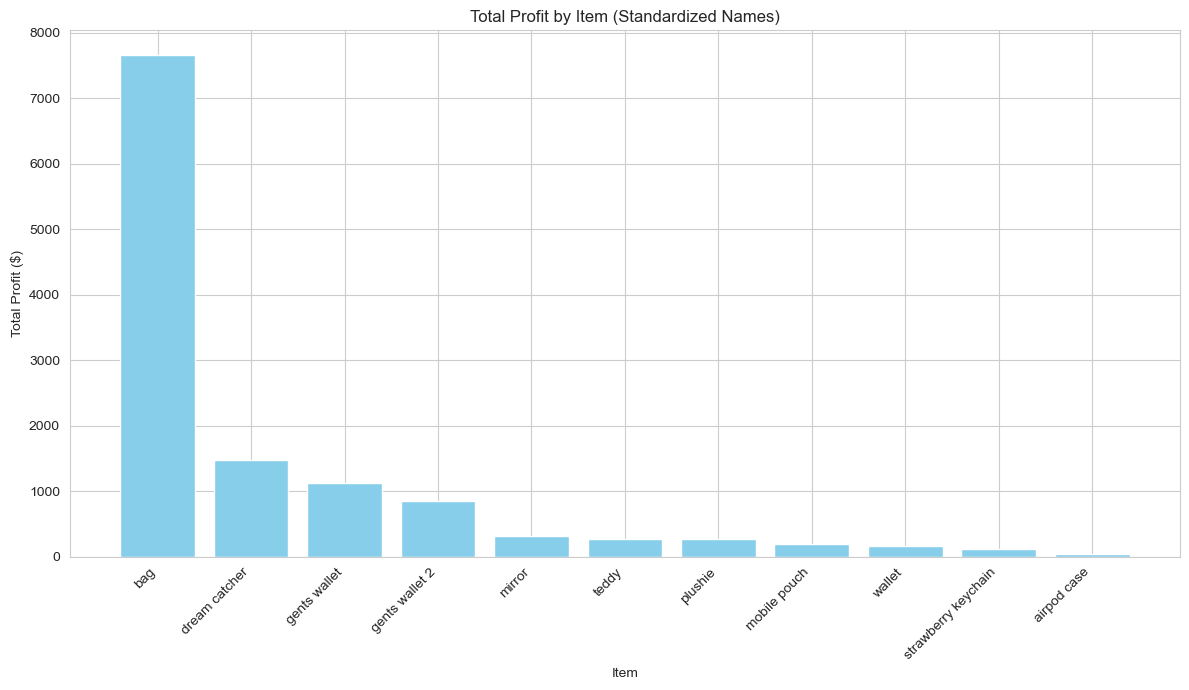


Average Profit by Item (after standardization):
item
bag                    765.000000
dream catcher          490.833333
gents wallet 2         425.000000
gents wallet           375.000000
mirror                 312.500000
teddy                  275.000000
plushie                270.000000
mobile pouch           190.000000
wallet                 160.000000
strawberry keychain    120.000000
airpod case             35.000000
Name: profit, dtype: float64


C:\Users\HASINI\AppData\Local\Temp\ipykernel_22048\4146439140.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_profit_by_item.index, y=avg_profit_by_item.values, palette='viridis')


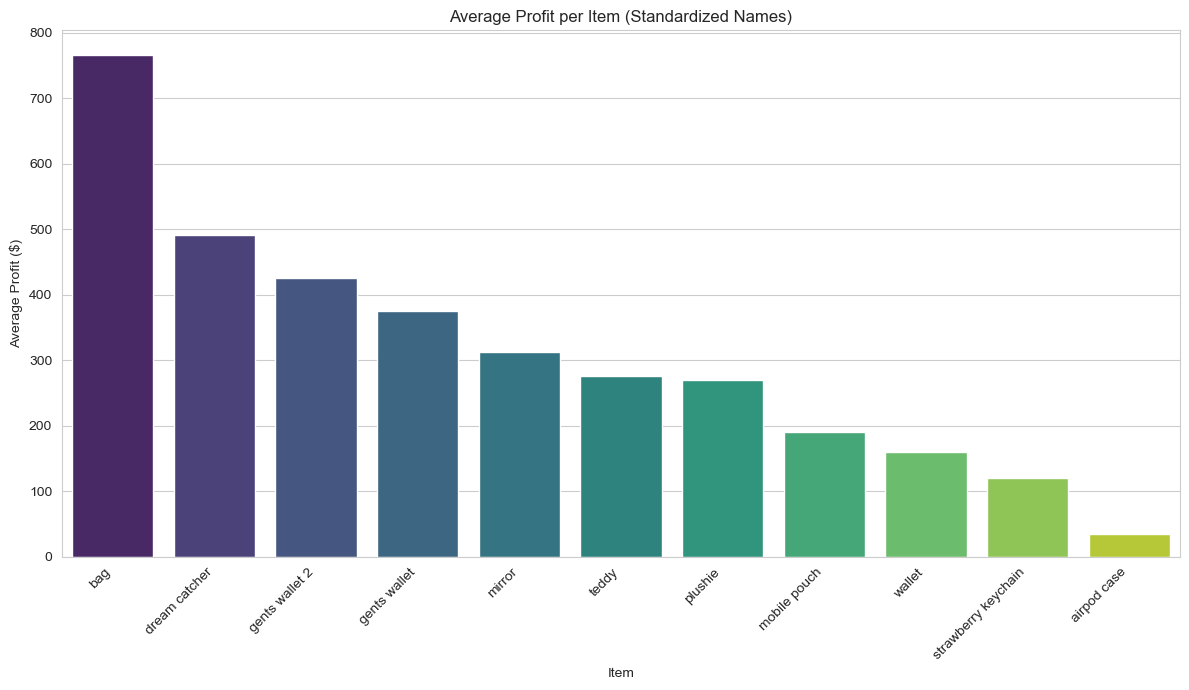

In [55]:

df['item'] = df['item'].astype(str).str.lower().str.strip()

print("Unique items after standardization:")
print(df['item'].unique())

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

profit_by_item = df.groupby('item')['profit'].sum().sort_values(ascending=False)
print("\nTotal Profit by Item (after standardization):")
print(profit_by_item)

plt.bar(profit_by_item.index, profit_by_item.values, color='skyblue')
plt.xlabel('Item')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit by Item (Standardized Names)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

avg_profit_by_item = df.groupby('item')['profit'].mean().sort_values(ascending=False)
print("\nAverage Profit by Item (after standardization):")
print(avg_profit_by_item)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_profit_by_item.index, y=avg_profit_by_item.values, palette='viridis')
plt.xlabel('Item')
plt.ylabel('Average Profit ($)')
plt.title('Average Profit per Item (Standardized Names)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Unique customers after standardization:
['vaishnavi' 'meenakshi' 'jayasree' 'sania' 'amrith' 'vani' 'aishwarya'
 'usha' 'akash' 'navya' 'sudha' 'harini' 'ananya' 'mamtha' 'garima'
 'sushma' 'harika']

Counts of each unique customer name after standardization:
customer
meenakshi    5
jayasree     3
amrith       3
vaishnavi    1
sudha        1
sushma       1
garima       1
mamtha       1
ananya       1
harini       1
akash        1
navya        1
usha         1
aishwarya    1
vani         1
sania        1
harika       1
Name: count, dtype: int64


C:\Users\HASINI\AppData\Local\Temp\ipykernel_22048\674249267.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_customer.head(top_n_customers).index,


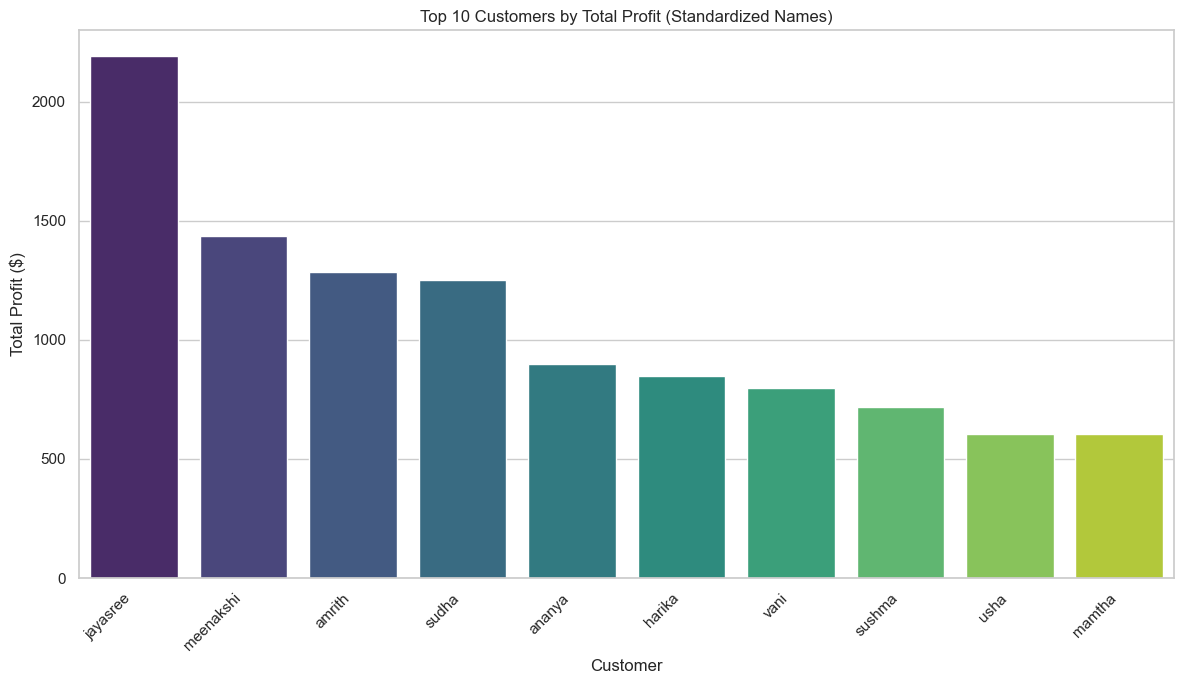


Top 10 Customers by Total Profit (Standardized Names):
customer
jayasree     2190.0
meenakshi    1437.5
amrith       1285.0
sudha        1250.0
ananya        900.0
harika        850.0
vani          800.0
sushma        720.0
usha          605.0
mamtha        605.0
Name: profit, dtype: float64


C:\Users\HASINI\AppData\Local\Temp\ipykernel_22048\674249267.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amount_earned_by_customer.head(top_n_customers).index,


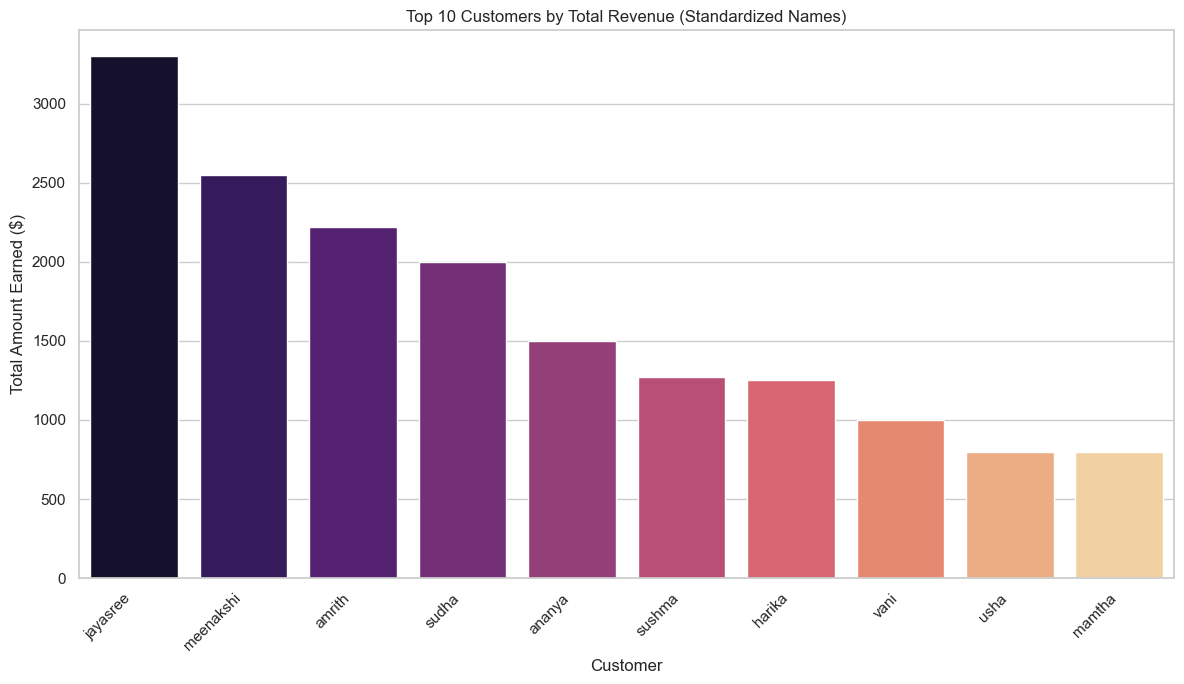


Top 10 Customers by Total Amount Earned (Standardized Names):
customer
jayasree     3300
meenakshi    2550
amrith       2220
sudha        2000
ananya       1500
sushma       1270
harika       1250
vani         1000
usha          800
mamtha        800
Name: amount_earned, dtype: int64


C:\Users\HASINI\AppData\Local\Temp\ipykernel_22048\674249267.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_count_by_customer.head(top_n_customers).index,


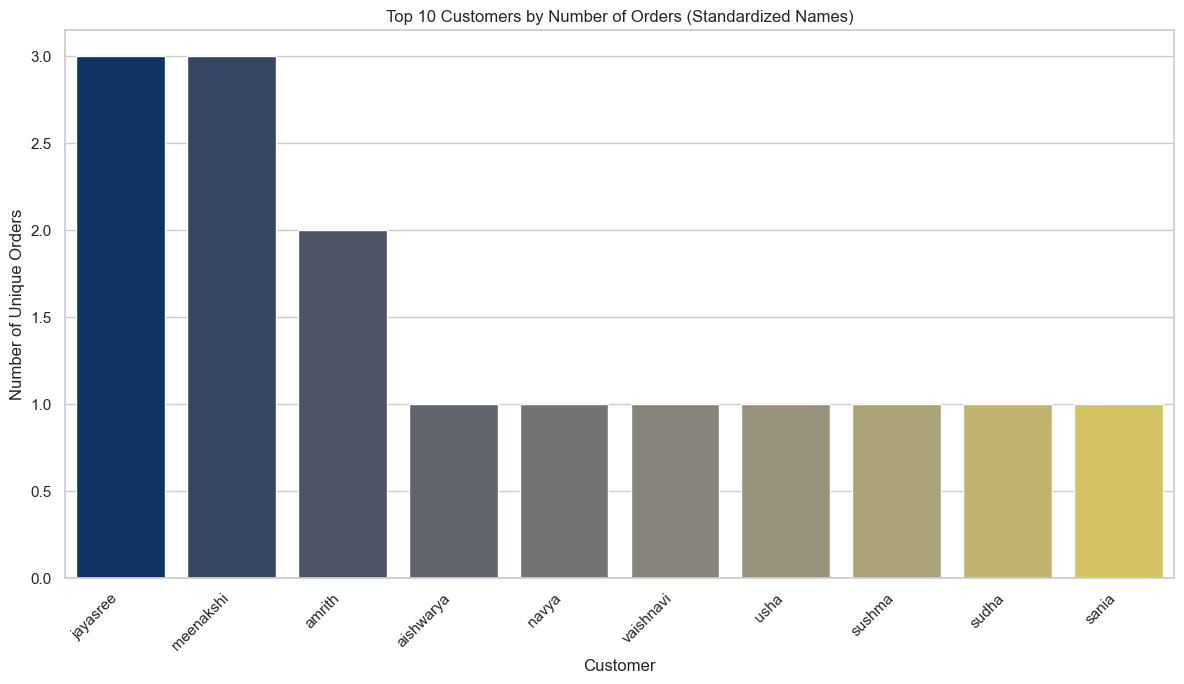


Top 10 Customers by Number of Orders (Standardized Names):
customer
jayasree     3
meenakshi    3
amrith       2
aishwarya    1
navya        1
vaishnavi    1
usha         1
sushma       1
sudha        1
sania        1
Name: order_number, dtype: int64

Comprehensive Summary for Top Customers (by Total Profit, Standardized Names):
           total_profit  total_earned  num_orders  avg_profit_per_order
customer                                                               
jayasree         2190.0          3300           3            730.000000
meenakshi        1437.5          2550           3            287.500000
amrith           1285.0          2220           2            428.333333
sudha            1250.0          2000           1           1250.000000
ananya            900.0          1500           1            900.000000
harika            850.0          1250           1            850.000000
vani              800.0          1000           1            800.000000
sushma            72

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['customer'] = df['customer'].astype(str).str.lower().str.strip()

print("Unique customers after standardization:")
print(df['customer'].unique())

print("\nCounts of each unique customer name after standardization:")
print(df['customer'].value_counts())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
profit_by_customer = df.groupby('customer')['profit'].sum().sort_values(ascending=False)
top_n_customers = 10
sns.barplot(x=profit_by_customer.head(top_n_customers).index,
            y=profit_by_customer.head(top_n_customers).values,
            palette='viridis')
plt.xlabel('Customer')
plt.ylabel('Total Profit ($)')
plt.title(f'Top {top_n_customers} Customers by Total Profit (Standardized Names)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nTop {top_n_customers} Customers by Total Profit (Standardized Names):")
print(profit_by_customer.head(top_n_customers))

plt.figure(figsize=(12, 7))
amount_earned_by_customer = df.groupby('customer')['amount_earned'].sum().sort_values(ascending=False)
sns.barplot(x=amount_earned_by_customer.head(top_n_customers).index,
            y=amount_earned_by_customer.head(top_n_customers).values,
            palette='magma')
plt.xlabel('Customer')
plt.ylabel('Total Amount Earned ($)')
plt.title(f'Top {top_n_customers} Customers by Total Revenue (Standardized Names)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nTop {top_n_customers} Customers by Total Amount Earned (Standardized Names):")
print(amount_earned_by_customer.head(top_n_customers))

plt.figure(figsize=(12, 7))
order_count_by_customer = df.groupby('customer')['order_number'].nunique().sort_values(ascending=False)
sns.barplot(x=order_count_by_customer.head(top_n_customers).index,
            y=order_count_by_customer.head(top_n_customers).values,
            palette='cividis')
plt.xlabel('Customer')
plt.ylabel('Number of Unique Orders')
plt.title(f'Top {top_n_customers} Customers by Number of Orders (Standardized Names)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nTop {top_n_customers} Customers by Number of Orders (Standardized Names):")
print(order_count_by_customer.head(top_n_customers))

customer_summary = df.groupby('customer').agg(
    total_profit=('profit', 'sum'),
    total_earned=('amount_earned', 'sum'),
    num_orders=('order_number', 'nunique'),
    avg_profit_per_order=('profit', lambda x: x.sum() / x.nunique())
).sort_values(by='total_profit', ascending=False)

print("\nComprehensive Summary for Top Customers (by Total Profit, Standardized Names):")
print(customer_summary.head(top_n_customers))
